In [208]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [209]:
data = pd.read_csv("SATData.csv")
data.drop(columns="Unnamed: 0", axis=1, inplace=True)
data

,GPA,SAT
0,3.4,1270
1,4.0,1220
2,3.8,1160
3,3.8,950
4,4.0,1070
...,...,...
995,3.7,1000
996,3.3,1080
997,3.5,1140
998,2.3,1200


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     1000 non-null   float64
 1   SAT     1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


<AxesSubplot: xlabel='GPA', ylabel='SAT'>

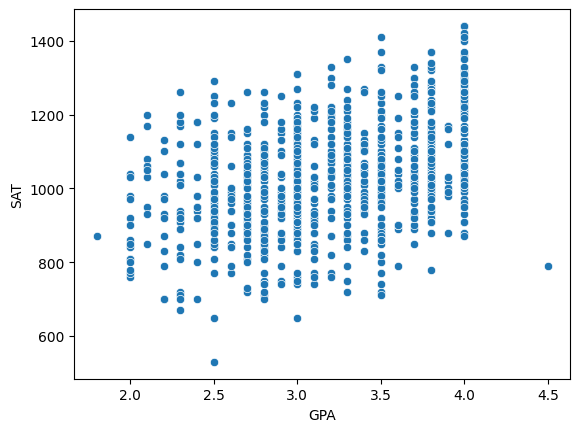

In [211]:
sns.scatterplot(data, x="GPA", y="SAT")

In [212]:
# Splitting the Data
split_index = int(len(data.index) / 2)

training_data, testing_data = data.iloc[:split_index], data.iloc[split_index:]

X_training, Y_training = training_data["GPA"], training_data["SAT"]

In [213]:
training_data

,GPA,SAT
0,3.4,1270
1,4.0,1220
2,3.8,1160
3,3.8,950
4,4.0,1070
...,...,...
495,2.2,870
496,3.7,970
497,2.9,1100
498,3.4,1100


In [214]:
# Linear Regression Algorithm
# y = mx + b

def sum_of_distances(df, b, m):
    total_distance = 0
    for index, row in df.iterrows():
        total_distance += abs(((m * row["GPA"]) + b) - (row["SAT"]))
    return total_distance

def LinearRegression(data):
    linear_equations = {}    # {b, m} : distance

    y_intercept = 700   # Initial y-intercept

    while y_intercept < 1100:
        slope = 1
        while slope < 125:
            # dict_index = "[" + str(y_intercept) + "," + str(slope) + "]"
            # linear_equations[dict_index] = sum_of_distances(data, y_intercept, slope)
            linear_equations[(y_intercept, slope)] = sum_of_distances(data, y_intercept, slope)
            slope += 1

        y_intercept += 1
    
    return linear_equations

In [215]:
regression_formulasdistances = LinearRegression(training_data)

In [216]:
regression_formulasdistances

{(700, 1): 168706.29999999993,
 (700, 2): 167112.59999999998,
 (700, 3): 165518.90000000002,
 (700, 4): 163927.6,
 (700, 5): 162339.5,
 (700, 6): 160753.4,
 (700, 7): 159178.49999999997,
 (700, 8): 157604.00000000003,
 (700, 9): 156029.49999999997,
 (700, 10): 154455.0,
 (700, 11): 152880.5,
 (700, 12): 151305.99999999994,
 (700, 13): 149732.1000000001,
 (700, 14): 148167.80000000005,
 (700, 15): 146613.5,
 (700, 16): 145062.39999999994,
 (700, 17): 143511.2999999999,
 (700, 18): 141965.4000000001,
 (700, 19): 140425.69999999998,
 (700, 20): 138886.0,
 (700, 21): 137359.29999999996,
 (700, 22): 135833.39999999985,
 (700, 23): 134315.70000000022,
 (700, 24): 132801.60000000006,
 (700, 25): 131287.5,
 (700, 26): 129780.59999999998,
 (700, 27): 128274.09999999982,
 (700, 28): 126777.20000000017,
 (700, 29): 125290.10000000002,
 (700, 30): 123807.0,
 (700, 31): 122327.89999999998,
 (700, 32): 120854.39999999989,
 (700, 33): 119381.10000000011,
 (700, 34): 117907.80000000003,
 (700, 35): 11

In [217]:
min(regression_formulasdistances.items(), key=lambda x: x[1])

((700, 105), 53971.5)

In [218]:
def MSE(df, b, m):
    sum = 0
    for index, row in df.iterrows():
        predicted = m * row["GPA"] + b
        actual = row["SAT"]
        sum += pow((predicted - actual),2)
    
    return sum

mean_squared = MSE(testing_data, 1000, 0.1)
mean_squared

9853756.376599994

<AxesSubplot: xlabel='GPA', ylabel='SAT'>

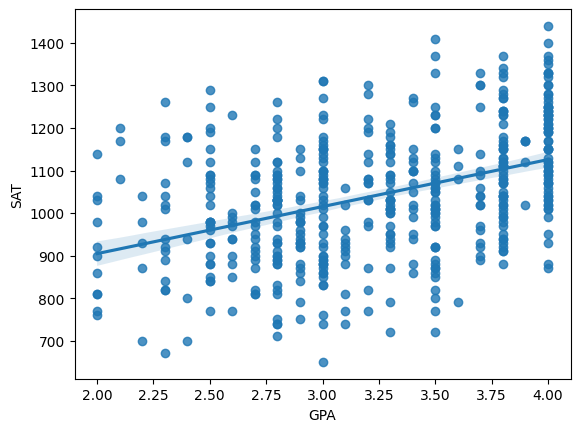

In [219]:
sns.regplot(data=training_data, x="GPA", y="SAT")

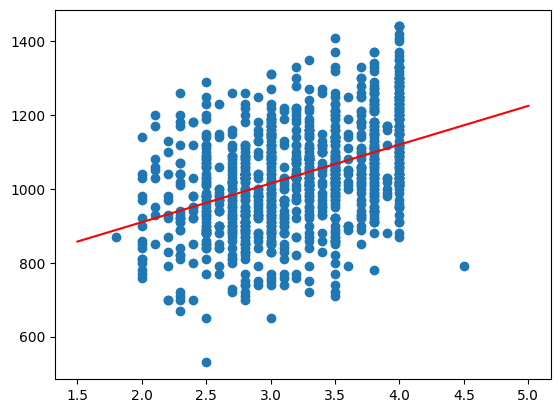

In [220]:
# gpa = np.array(data["GPA"].to_numpy)
# sat = np.array(data["SAT"].to_numpy)
# gpa
plt.scatter(data["GPA"], data["SAT"])
x = np.linspace(1.5, 5, 1000)
y = 105 * x + 700
plt.plot(x, y, "red")

plt.show()